<a href="https://colab.research.google.com/github/Shayari08/RedWineQualityAnalysis/blob/main/redwinequalityprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [33]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(df)


Saving wineQualityReds.csv to wineQualityReds (2).csv
      Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  \
0              1            7.4             0.700         0.00   
1              2            7.8             0.880         0.00   
2              3            7.8             0.760         0.04   
3              4           11.2             0.280         0.56   
4              5            7.4             0.700         0.00   
...          ...            ...               ...          ...   
1594        1595            6.2             0.600         0.08   
1595        1596            5.9             0.550         0.10   
1596        1597            6.3             0.510         0.13   
1597        1598            5.9             0.645         0.12   
1598        1599            6.0             0.310         0.47   

      residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
0                1.9      0.076                 11.0                  34.0 

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'fixed.acidity'}>,
        <Axes: title={'center': 'volatile.acidity'}>,
        <Axes: title={'center': 'citric.acid'}>],
       [<Axes: title={'center': 'residual.sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free.sulfur.dioxide'}>,
        <Axes: title={'center': 'total.sulfur.dioxide'}>],
       [<Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>],
       [<Axes: title={'center': 'quality'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

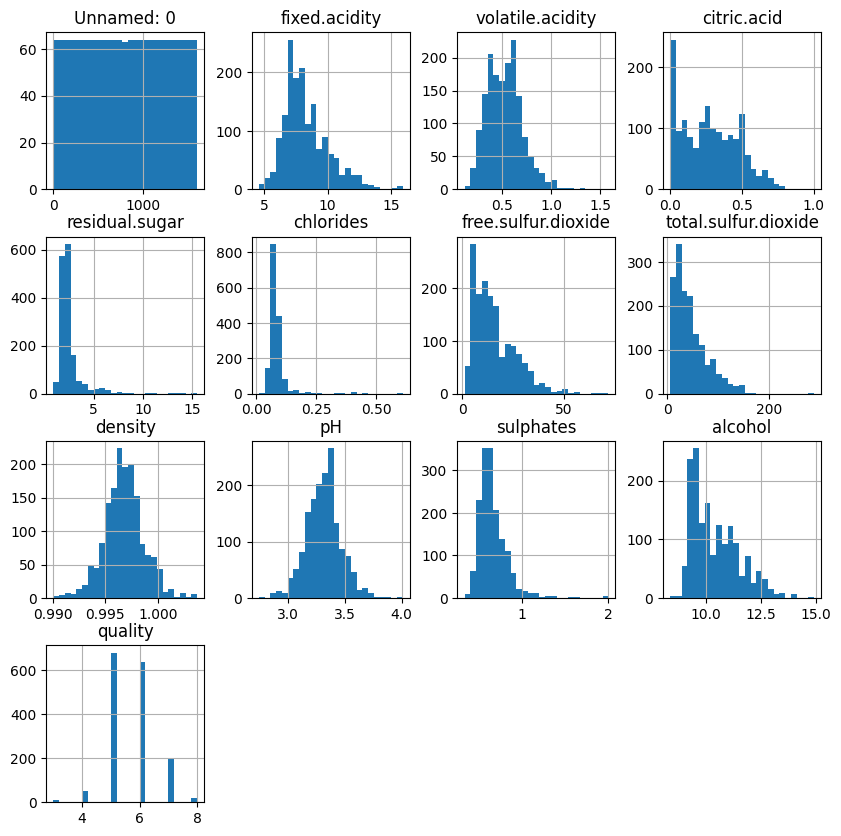

In [34]:
df.hist(bins=25, figsize=(10,10))

<ipython-input-35-874326f2d776>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],hist_kws=dict(edgecolor="k",linewidth=1, color='blue'), color='red')
<ipython-input-35-874326f2d776>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col],hist_kws=dict(edgecolor="k",linewidth=1, color='blu

ValueError: ignored

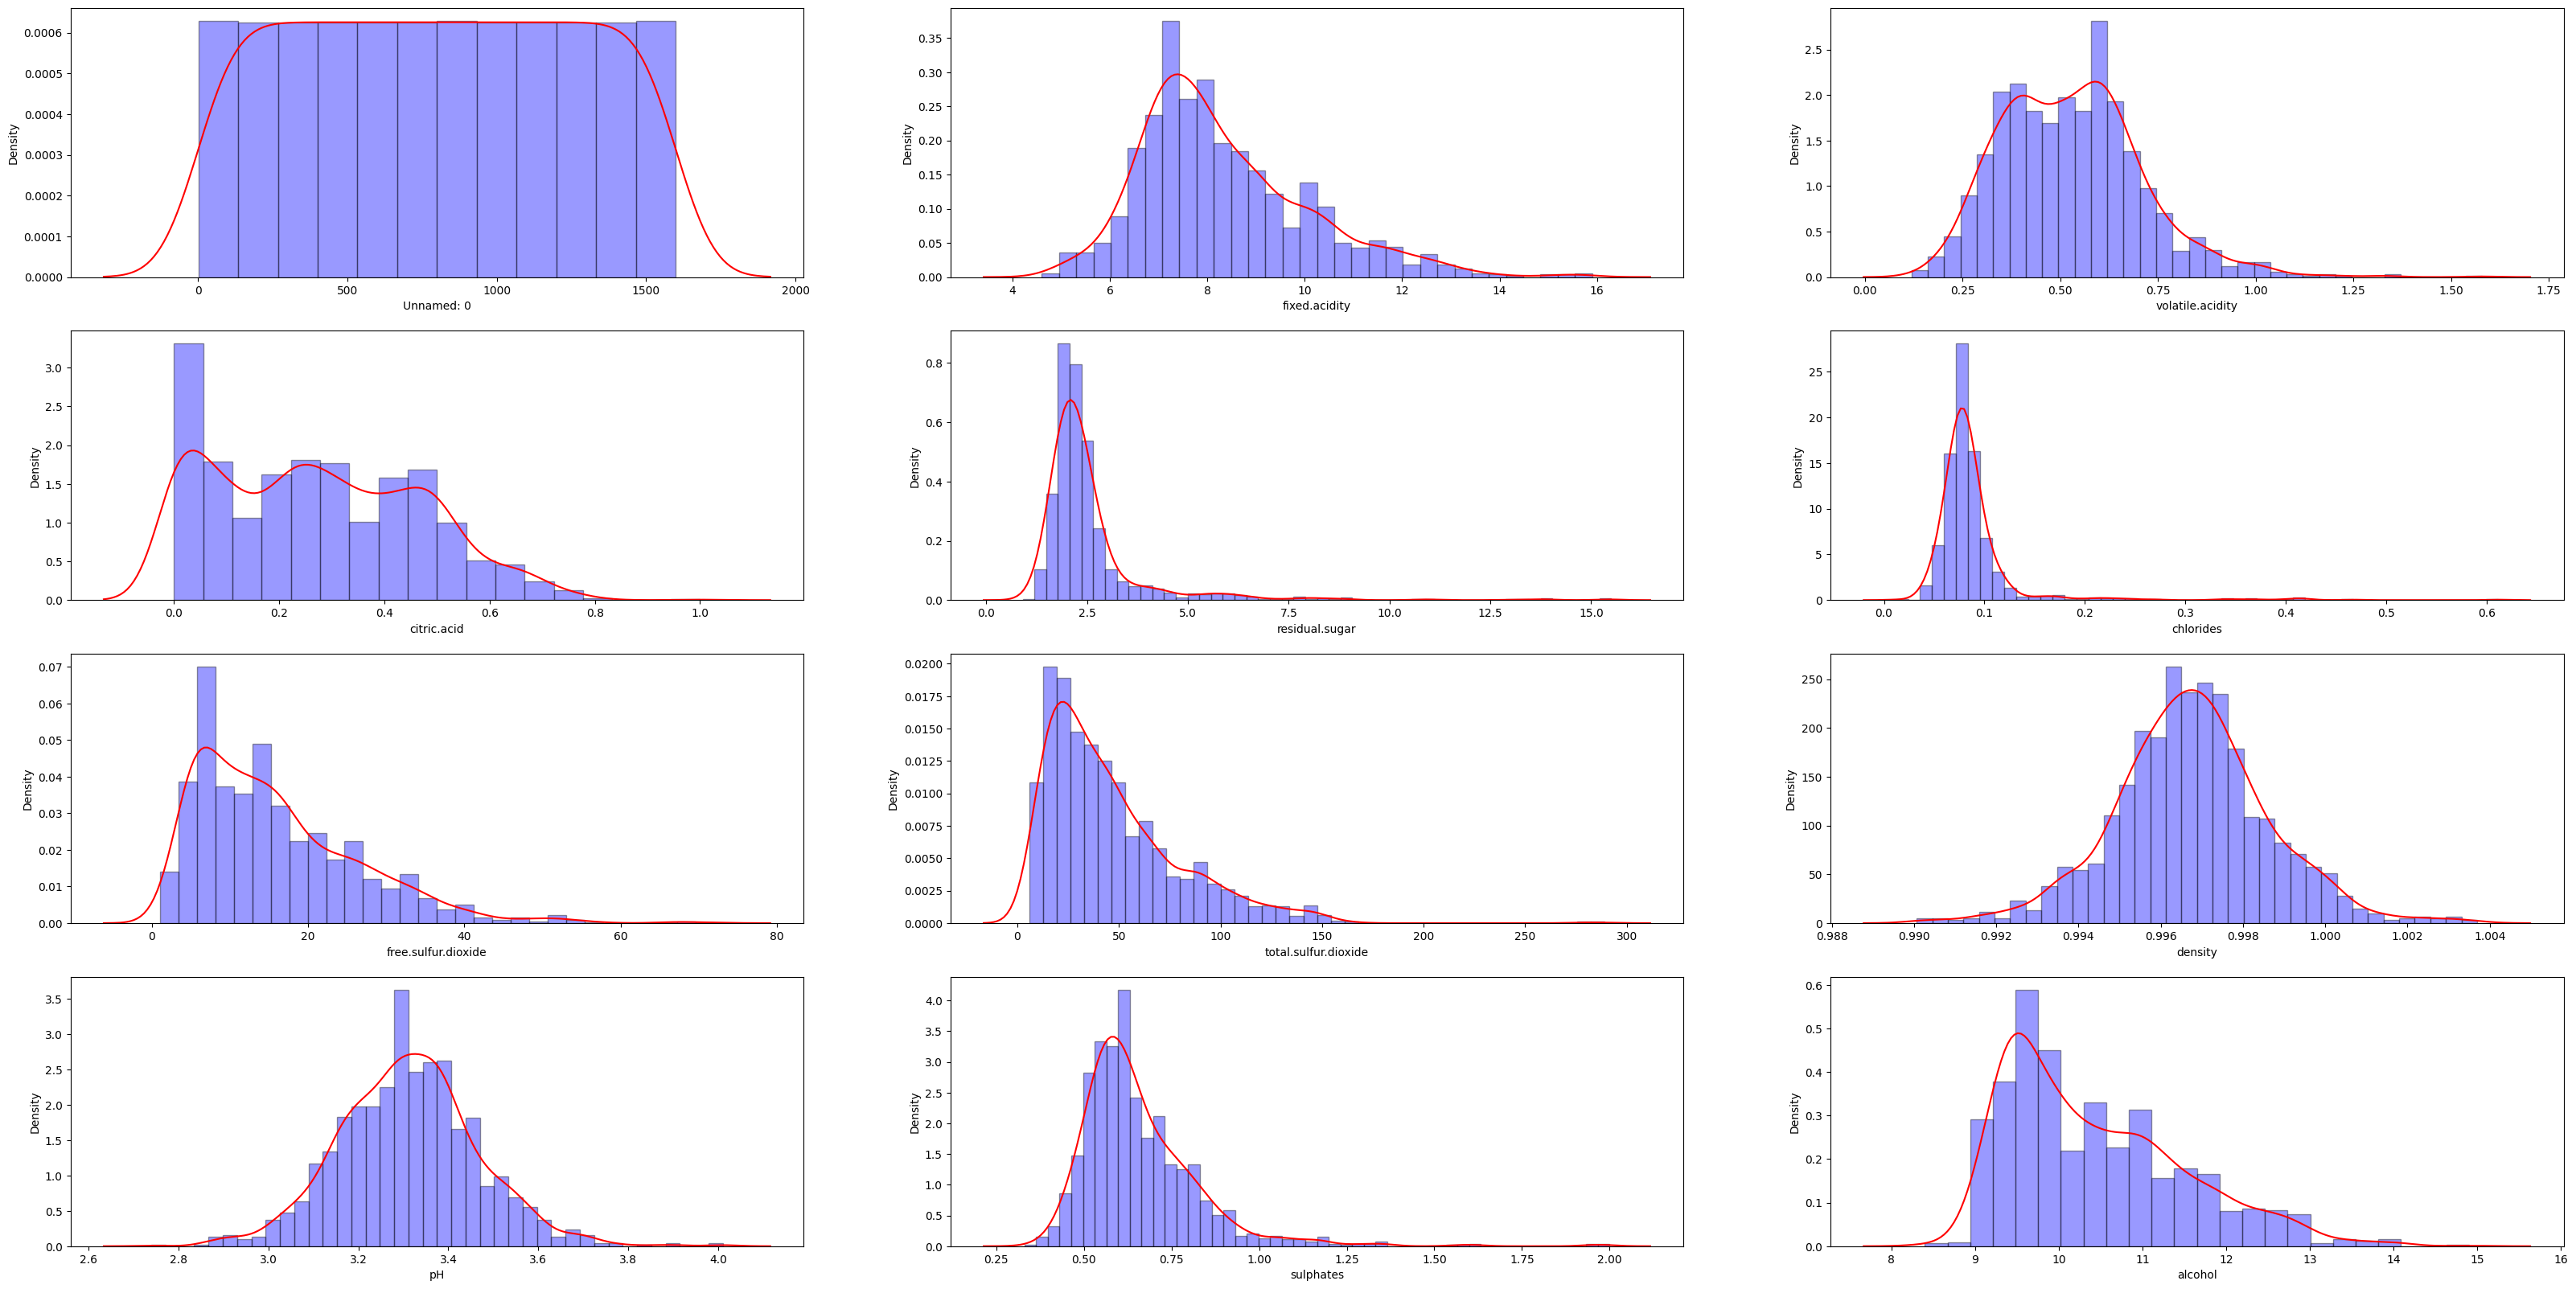

In [35]:
fig=plt.figure(figsize=[40,20])
cols=df.columns
cnt=1
for col in cols:
  plt.subplot(4,3,cnt)
  sb.distplot(df[col],hist_kws=dict(edgecolor="k",linewidth=1, color='blue'), color='red')
  cnt+=1
plt.tight_layout()
plt.show()

Text(0, 0.5, 'alcohol')

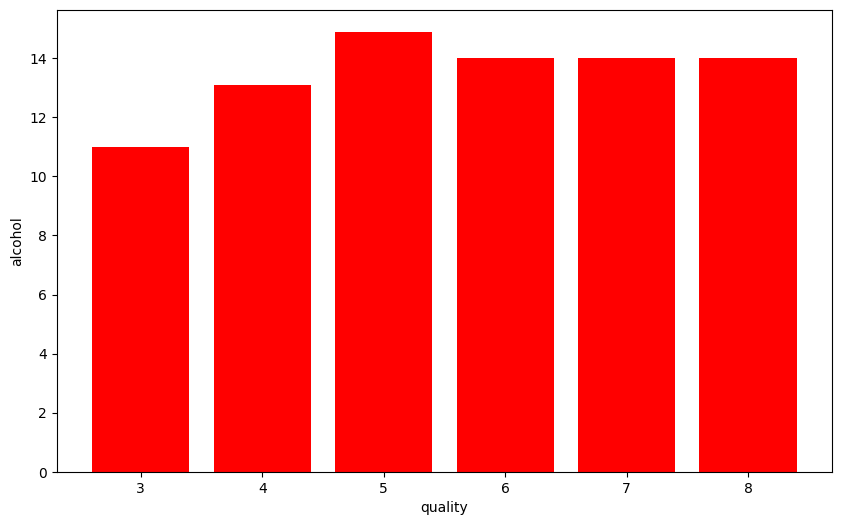

In [36]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

<Axes: >

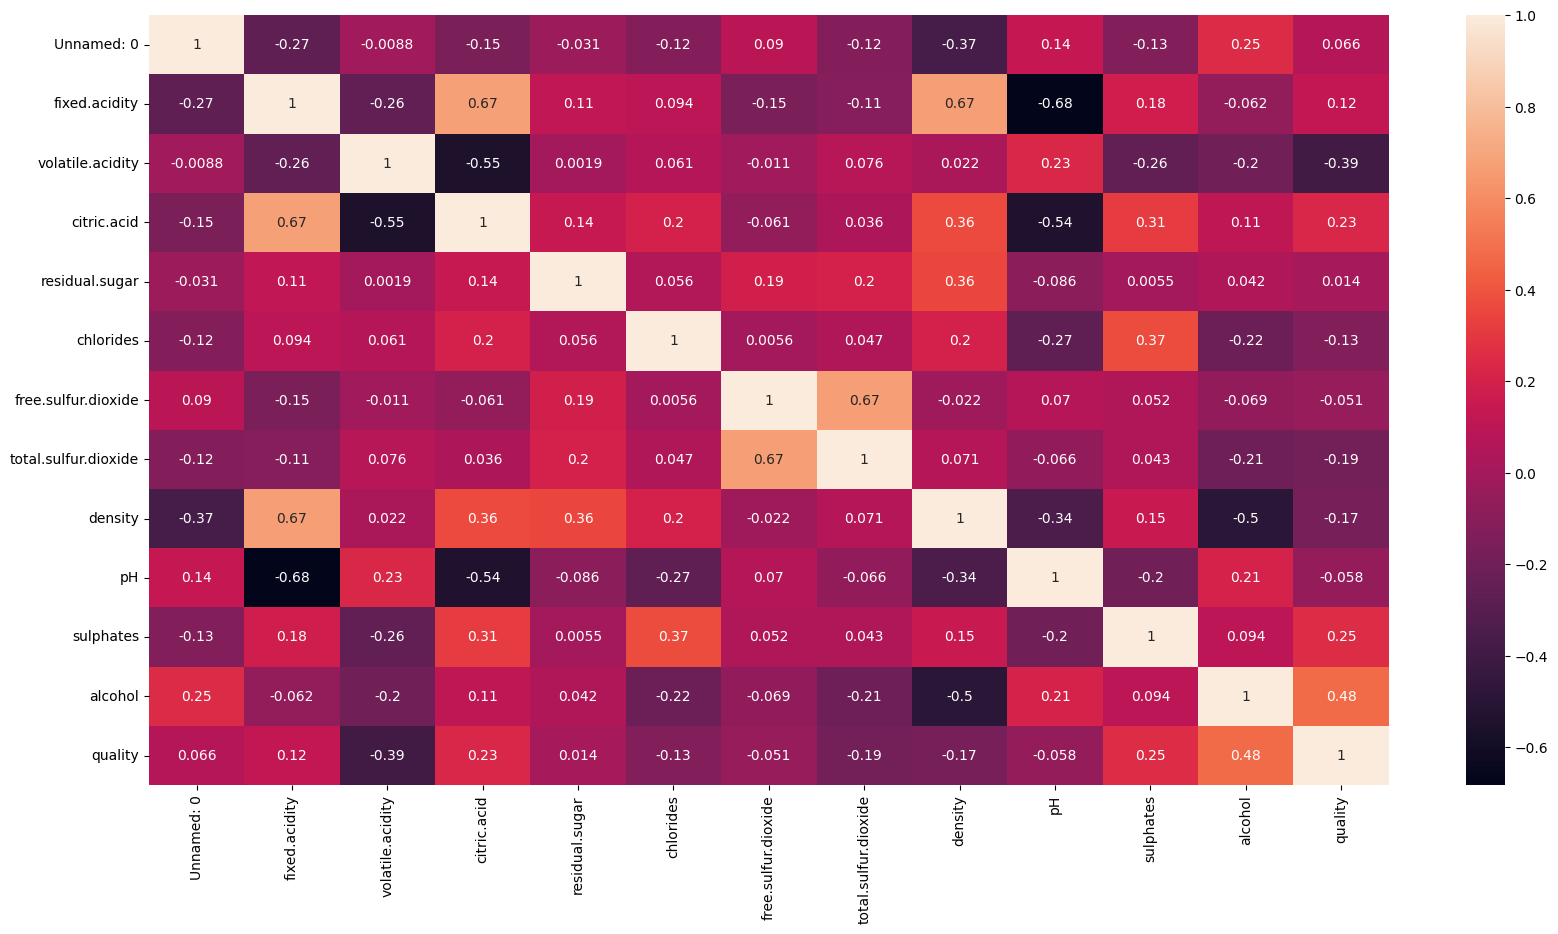

In [37]:
plt.figure(figsize=[20,10])
sb.heatmap(df.corr(), annot=True)

In [38]:
print(df.columns)

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


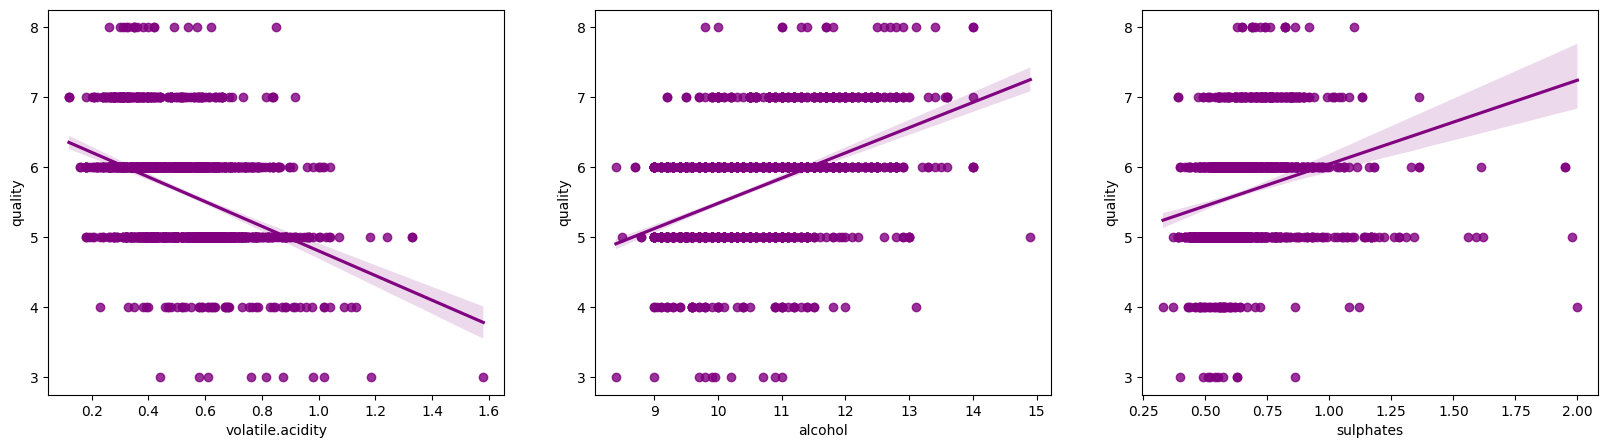

In [39]:
fig,axs=plt.subplots(nrows=1,ncols=3, figsize=(20,5))
cols=['volatile.acidity', 'alcohol', 'sulphates']
for col,ax in zip(cols, axs.flat):
  sb.regplot(x=df[col], y=df['quality'], color='purple',ax=ax)

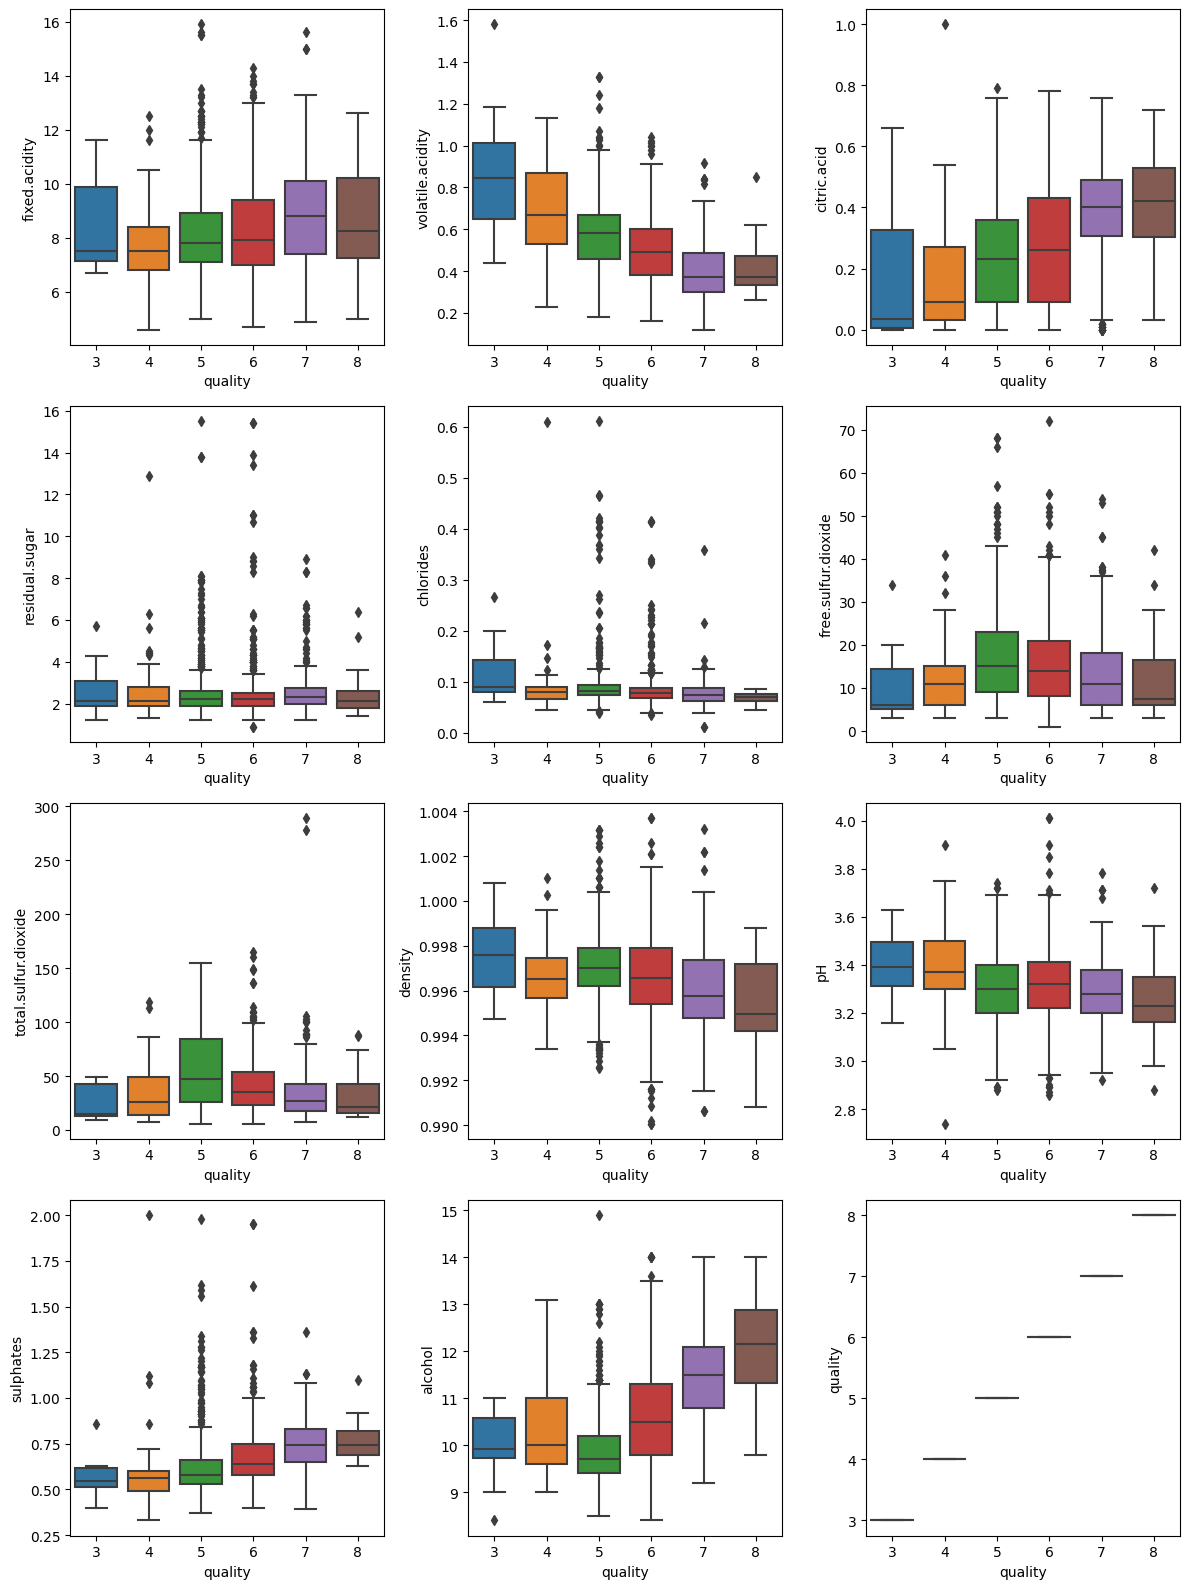

In [41]:
cols = ['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']
fig, axes = plt.subplots(4, 3, figsize=(12, 16))
axes = axes.flatten()
for i, col in enumerate(cols):
    sb.boxplot(x="quality", y=col, data=df, ax=axes[i])
plt.tight_layout()
plt.show()

In [42]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

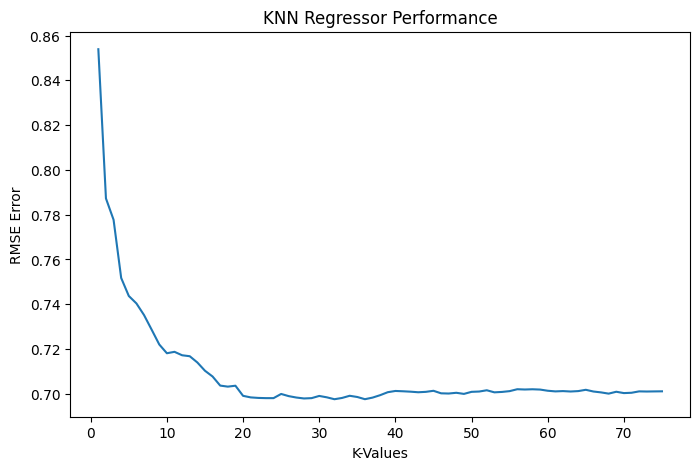

In [43]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
target = df['quality']
features = df.drop('quality', axis=1)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3)

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rms_error = []
for K in range(1, 76):
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    error = mean_squared_error(Y_test, pred, squared=False)
    rms_error.append(error)

x = np.linspace(1, 75, num=75)
y = rms_error

fig, ax = plt.subplots(figsize=[8, 5])
ax.plot(x, y)
plt.xlabel('K-Values')
plt.ylabel('RMSE Error')
plt.title('KNN Regressor Performance')
plt.show()
